## DATA PREPARATION

In [110]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import scipy

pd.set_option('display.max_rows', 30)

In [111]:
# e.g. results/fidelity_eval_20_fps_substepping_1.json
path = "data/*.json"

data = []


def make_df(path):
    with open(file_path, "r") as f:
        quality = "high" if "high" in file_path else "low"
        content = json.load(f)
        data = {
            'quality': quality,
            'records': content['_checkpoint']['records']
        }
        df = pd.DataFrame(data)
        return df


dfs = []
for file_path in glob.glob(path):
    dfs.append(make_df(file_path))
low, high = dfs

In [112]:
low

,quality,records
0,low,"{'index': 0, 'infractions': {'collisions_layou..."
1,low,"{'index': 1, 'infractions': {'collisions_layou..."
2,low,"{'index': 2, 'infractions': {'collisions_layou..."
3,low,"{'index': 3, 'infractions': {'collisions_layou..."
4,low,"{'index': 4, 'infractions': {'collisions_layou..."
...,...,...
552,low,"{'index': 552, 'infractions': {'collisions_lay..."
553,low,"{'index': 553, 'infractions': {'collisions_lay..."
554,low,"{'index': 554, 'infractions': {'collisions_lay..."
555,low,"{'index': 555, 'infractions': {'collisions_lay..."


In [113]:
def process_df(df):
    record_df = pd.json_normalize(df['records'])
    # concatonate records data
    df = pd.concat([df, record_df],  axis=1)

    # drop original column
    df = df.drop('records', axis=1)

    # drop infractions columns

    # remove prefices from column name
    df.columns = df.columns.str.removeprefix('meta.')
    df.columns = df.columns.str.removeprefix('scores.')
    # df = df.rename(columns={"index": "route_index"})
    return df

In [ ]:
process_df(low)

In [115]:
process_df(high)

,quality,index,route_id,status,infractions.collisions_layout,infractions.collisions_pedestrian,infractions.collisions_vehicle,infractions.outside_route_lanes,infractions.red_light,infractions.route_dev,infractions.route_timeout,infractions.stop_infraction,infractions.vehicle_blocked,duration_game,duration_system,route_length,score_composed,score_penalty,score_route
0,high,0,RouteScenario_0,Completed,[Agent collided against object with type=stati...,[],[],[],[],[],[],[],[],218.850003,358.418470,350.831252,65.000000,0.650000,100.000000
1,high,1,RouteScenario_1,Completed,[Agent collided against object with type=stati...,[],[],[],[],[],[],[],[],198.150003,321.776294,340.164158,17.850625,0.178506,100.000000
2,high,2,RouteScenario_2,Completed,[],[],[],[],[],[],[],[],[],174.100003,283.162881,367.771838,100.000000,1.000000,100.000000
3,high,3,RouteScenario_3,Completed,[],[],[],[],[],[],[],[],[],222.500003,361.648254,308.316669,100.000000,1.000000,100.000000
4,high,4,RouteScenario_4,Completed,[],[],[Agent collided against object with type=vehic...,[],[],[],[],[],[],211.750003,342.312623,283.469059,60.000000,0.600000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,high,477,RouteScenario_477,Completed,[],[],[],[],[],[],[],[],[],283.850004,500.970825,274.369505,100.000000,1.000000,100.000000
478,high,478,RouteScenario_478,Completed,[],[],[],[],"[Agent ran a red light 144377 at (x=250.2, y=-...",[],[],[],[],289.400004,510.258348,259.622083,70.000000,0.700000,100.000000
479,high,479,RouteScenario_479,Completed,[],[],[Agent collided against object with type=vehic...,[],[],[],[],[],[],256.950004,454.144940,255.955353,60.000000,0.600000,100.000000
480,high,480,RouteScenario_480,Completed,[],[],[],[],[],[],[],[],[],281.450004,494.695230,341.803680,100.000000,1.000000,100.000000


In [103]:
# concatonate records data
df = pd.concat([df, record_df],  axis=1)

# drop original column
df = df.drop('records', axis=1)

# drop infractions columns

# remove prefices from column name
df.columns = df.columns.str.removeprefix('meta.')
df.columns = df.columns.str.removeprefix('scores.')
# df = df.rename(columns={"index": "route_index"})

In [104]:
df

,quality,index,route_id,status,infractions.collisions_layout,infractions.collisions_pedestrian,infractions.collisions_vehicle,infractions.outside_route_lanes,infractions.red_light,infractions.route_dev,infractions.route_timeout,infractions.stop_infraction,infractions.vehicle_blocked,duration_game,duration_system,route_length,score_composed,score_penalty,score_route
0,low,0,RouteScenario_0,Failed - Agent timed out,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[Route timeout.],[],[],301.100004,429.373370,350.831252,5.687042,0.199651,28.484948
1,low,1,RouteScenario_1,Failed - Agent got blocked,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],"[Agent got blocked at (x=18.974, y=106.584, z=...",197.300003,279.547549,340.164158,3.665588,0.265831,13.789154
2,low,2,RouteScenario_2,Failed - Agent timed out,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[Route timeout.],[],[],307.100005,437.706663,367.771838,28.043623,0.584205,48.003024
3,low,3,RouteScenario_3,Failed - Agent got blocked,[Agent collided against object with type=stati...,[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],"[Agent got blocked at (x=193.75, y=114.745, z=...",258.700004,367.875158,308.316669,11.066998,0.370774,29.848358
4,low,4,RouteScenario_4,Failed - Agent got blocked,[Agent collided against object with type=stati...,[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],"[Agent got blocked at (x=193.493, y=112.074, z...",200.300003,284.507146,283.469059,6.003490,0.364879,16.453378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,low,552,RouteScenario_552,Completed,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],[],77.700001,99.934752,225.332045,30.851635,0.308516,100.000000
553,low,553,RouteScenario_553,Completed,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],[],94.800001,105.918728,229.380665,35.132652,0.351327,100.000000
554,low,554,RouteScenario_554,Failed - Agent timed out,[],[],[Agent collided against object with type=vehic...,[],[],[],[Route timeout.],[],[],219.100003,253.555212,262.938918,28.582321,0.600000,47.637202
555,low,555,RouteScenario_555,Failed,[],[],[],[],[],[],[],[],[],12.600000,4547.296136,346.650458,10.503877,1.000000,10.503877


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   quality                            557 non-null    object 
 1   index                              557 non-null    int64  
 2   route_id                           557 non-null    object 
 3   status                             557 non-null    object 
 4   infractions.collisions_layout      557 non-null    object 
 5   infractions.collisions_pedestrian  557 non-null    object 
 6   infractions.collisions_vehicle     557 non-null    object 
 7   infractions.outside_route_lanes    557 non-null    object 
 8   infractions.red_light              557 non-null    object 
 9   infractions.route_dev              557 non-null    object 
 10  infractions.route_timeout          557 non-null    object 
 11  infractions.stop_infraction        557 non-null    object 

In [92]:
process_df(low)

,quality,records
0,low,index
1,low,infractions
2,low,meta
3,low,route_id
4,low,scores
...,...,...
3337,low,infractions
3338,low,meta
3339,low,route_id
3340,low,scores


In [93]:
# interesting_columns = ['fps', 'quality',
#                        'route_id', 'status', 'duration_game', 'duration_system', 'route_length', 'score_composed', 'score_penalty', 'score_route']
# df = df[interesting_columns]

df

,quality,index,route_id,status,infractions.collisions_layout,infractions.collisions_pedestrian,infractions.collisions_vehicle,infractions.outside_route_lanes,infractions.red_light,infractions.route_dev,infractions.route_timeout,infractions.stop_infraction,infractions.vehicle_blocked,duration_game,duration_system,route_length,score_composed,score_penalty,score_route
0,low,0,RouteScenario_0,Failed - Agent timed out,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[Route timeout.],[],[],301.100004,429.373370,350.831252,5.687042,0.199651,28.484948
1,low,1,RouteScenario_1,Failed - Agent got blocked,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],"[Agent got blocked at (x=18.974, y=106.584, z=...",197.300003,279.547549,340.164158,3.665588,0.265831,13.789154
2,low,2,RouteScenario_2,Failed - Agent timed out,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[Route timeout.],[],[],307.100005,437.706663,367.771838,28.043623,0.584205,48.003024
3,low,3,RouteScenario_3,Failed - Agent got blocked,[Agent collided against object with type=stati...,[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],"[Agent got blocked at (x=193.75, y=114.745, z=...",258.700004,367.875158,308.316669,11.066998,0.370774,29.848358
4,low,4,RouteScenario_4,Failed - Agent got blocked,[Agent collided against object with type=stati...,[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],"[Agent got blocked at (x=193.493, y=112.074, z...",200.300003,284.507146,283.469059,6.003490,0.364879,16.453378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,low,552,RouteScenario_552,Completed,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],[],77.700001,99.934752,225.332045,30.851635,0.308516,100.000000
553,low,553,RouteScenario_553,Completed,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],[],94.800001,105.918728,229.380665,35.132652,0.351327,100.000000
554,low,554,RouteScenario_554,Failed - Agent timed out,[],[],[Agent collided against object with type=vehic...,[],[],[],[Route timeout.],[],[],219.100003,253.555212,262.938918,28.582321,0.600000,47.637202
555,low,555,RouteScenario_555,Failed,[],[],[],[],[],[],[],[],[],12.600000,4547.296136,346.650458,10.503877,1.000000,10.503877


In [94]:
df['route_index'] = df['route_id'].str.removeprefix("RouteScenario_")
df['route_index'] = pd.to_numeric(df['route_index'])
df['route_index'] -= df['route_index'].min()

### Params

- 7 scenarios
- 3 repetations
- 2 quality levels ('epic'/'low')
- 3 fps levels (10/20/30)

126 executions

In [95]:
# df = df.set_index(['fps', 'quality', 'route_id']).sort_index()
N_SCENARIOS = 7
df = df[df['route_index'] < 7]
df

,quality,index,route_id,status,infractions.collisions_layout,infractions.collisions_pedestrian,infractions.collisions_vehicle,infractions.outside_route_lanes,infractions.red_light,infractions.route_dev,infractions.route_timeout,infractions.stop_infraction,infractions.vehicle_blocked,duration_game,duration_system,route_length,score_composed,score_penalty,score_route,route_index
0,low,0,RouteScenario_0,Failed - Agent timed out,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[Route timeout.],[],[],301.100004,429.373370,350.831252,5.687042,0.199651,28.484948,0
1,low,1,RouteScenario_1,Failed - Agent got blocked,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],"[Agent got blocked at (x=18.974, y=106.584, z=...",197.300003,279.547549,340.164158,3.665588,0.265831,13.789154,1
2,low,2,RouteScenario_2,Failed - Agent timed out,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[Route timeout.],[],[],307.100005,437.706663,367.771838,28.043623,0.584205,48.003024,2
3,low,3,RouteScenario_3,Failed - Agent got blocked,[Agent collided against object with type=stati...,[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],"[Agent got blocked at (x=193.75, y=114.745, z=...",258.700004,367.875158,308.316669,11.066998,0.370774,29.848358,3
4,low,4,RouteScenario_4,Failed - Agent got blocked,[Agent collided against object with type=stati...,[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],"[Agent got blocked at (x=193.493, y=112.074, z...",200.300003,284.507146,283.469059,6.003490,0.364879,16.453378,4
5,low,5,RouteScenario_5,Failed - Agent got blocked,[],[],[Agent collided against object with type=vehic...,[],[],[],[],[],"[Agent got blocked at (x=189.902, y=112.552, z...",188.800003,265.077399,289.923792,6.131361,0.600000,10.218935,5
6,low,6,RouteScenario_6,Failed - Agent got blocked,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,[],[],[],[],"[Agent got blocked at (x=191.358, y=113.956, z...",189.400003,269.020062,296.912380,1.321291,0.336955,3.921264,6


# Q1: How does fidelity settings affect executi<on time

KeyError: 'fps'

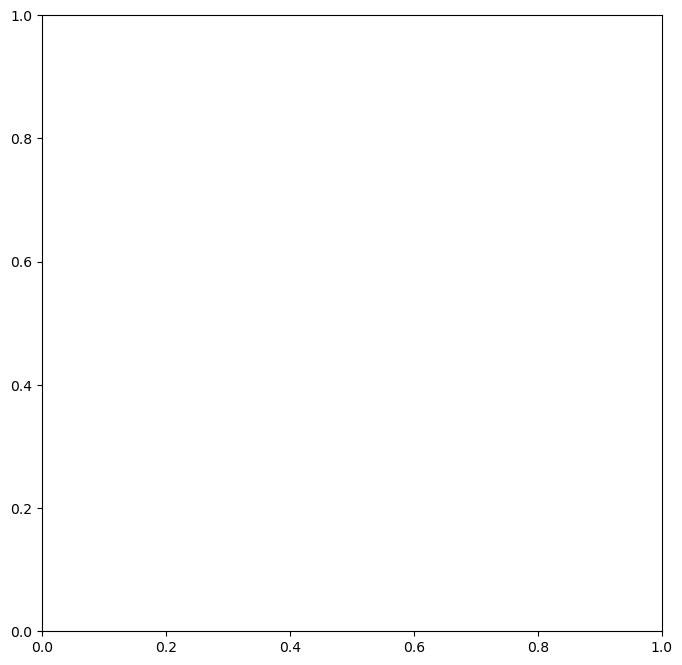

In [96]:
fig, ax = plt.subplots(figsize=(8, 8))

axes = df.boxplot(column=['duration_system',],
                  by=['fps', 'quality'], ax=ax)

axes.set_title("")
axes.set_ylabel("System time [s]", fontsize=16)
axes.tick_params(axis='both', labelsize=12)
# axes[1].set_title("Game time [s]")

# plt.tight_layout()

### Conclusions:

Yay lower quality lower execution time

Lower FPS lower execution time

### Q1.1 Does quality affect execution time?

Text(0.5, 1.0, 'System time [s]')

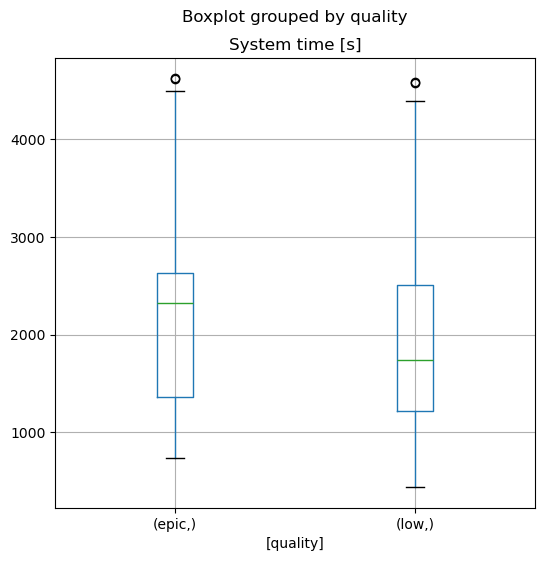

In [ ]:
size = 6
fig, ax = plt.subplots(figsize=(size, size))

axes = df.boxplot(column=['duration_system'],
                  by=['quality'], ax=ax)

axes.set_title("System time [s]")

In [ ]:
df[['quality', 'duration_system']].groupby('quality').mean()

,duration_system
quality,
epic,2240.271880
low,1935.550502


### Q1.2 Does FPS affect execution time?

Text(0.5, 1.0, 'System time [s]')

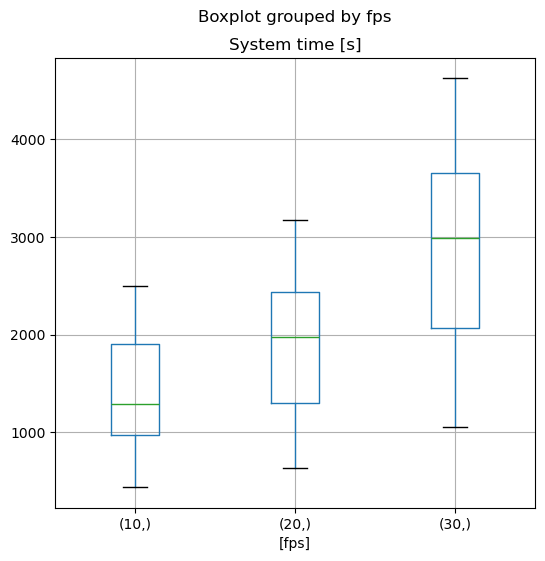

In [ ]:
size = 6
fig, ax = plt.subplots(figsize=(size, size))

axes = df.boxplot(column=['duration_system'],
                  by=['fps'], ax=ax)

axes.set_title("System time [s]")

In [ ]:
means = df[['fps', 'duration_system']].groupby('fps').mean()
low_fps = means.loc[10, 'duration_system']
baseline_fps = means.loc[20, 'duration_system']
high_fps = means.loc[30, 'duration_system']


def percentage_smaller(smaller, larger):
    return ((smaller / larger) * 100) - 100


print(
    f"The 10FPS is {percentage_smaller(low_fps,baseline_fps):.2f}% smaller than the baseline 20FPS.")

print(
    f"The 30FPS is {percentage_smaller(high_fps, baseline_fps):.2f}% bigger than the baseline 20FPS.")

means

The 10FPS is -27.40% smaller than the baseline 20FPS.
The 30FPS is 49.90% bigger than the baseline 20FPS.


,duration_system
fps,
10,1410.111572
20,1942.252524
30,2911.369478


### Conclusions: 

substepping doesnt reduce execution time significantly

# Q2: How does fidelity settings affect ADS performance (score_composed, score_penalty, score_route)

/tmp/ipykernel_14649/3498353464.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes = df.boxplot(column=['score_route', 'score_composed'],


<Axes: title={'center': 'score_penalty'}, xlabel='fps'>

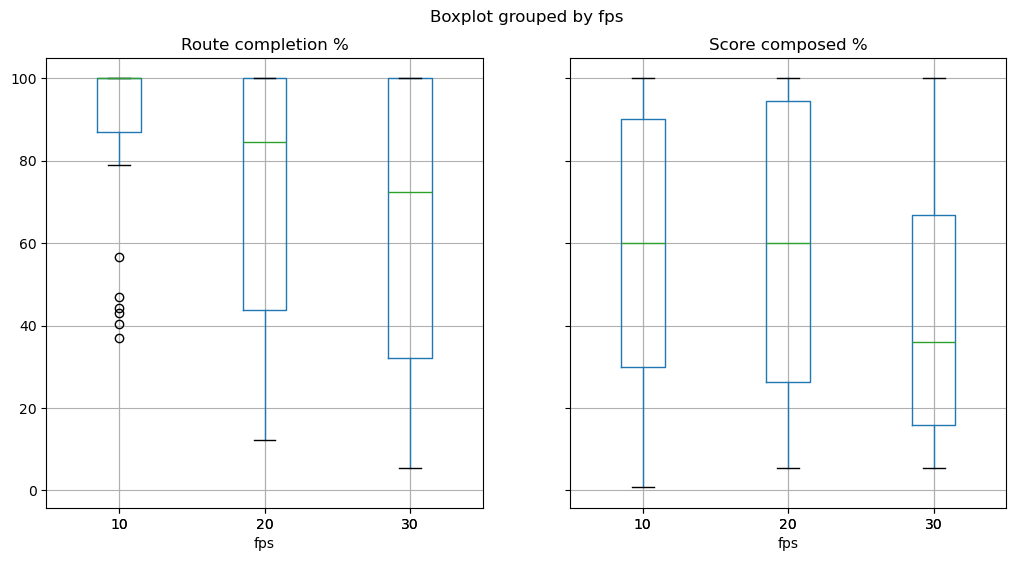

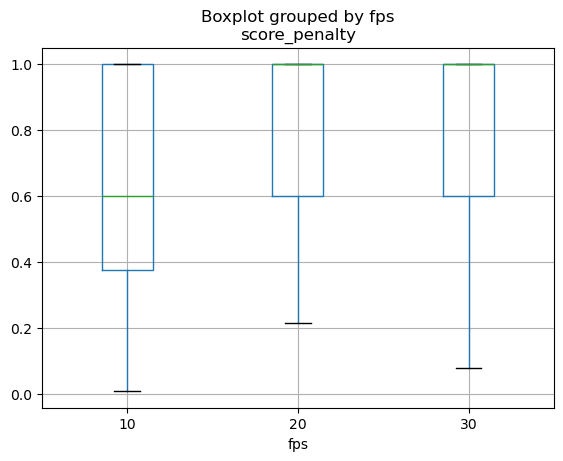

In [ ]:
size = 6
fig, ax = plt.subplots(figsize=(size*2, size))

axes = df.boxplot(column=['score_route', 'score_composed'],
                  by='fps', ax=ax)

axes[0].set_title("Route completion %")
axes[1].set_title("Score composed %")


df.boxplot(column=['score_penalty'],
           by='fps')

### Conclusions

- At 10FPS car gets more penaulties, but has higher route complition rate
- Probably time out issues, so when lovering the 10FPS we need to adjust timeout criteria.
-  At 10FPS car has efectevly less time to make mistakes?


### Q2.2 Does quality affect ADS performance?

/tmp/ipykernel_14649/2091460531.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes = df.boxplot(column=['score_route', 'score_composed'],


<Axes: title={'center': 'score_penalty'}, xlabel='quality'>

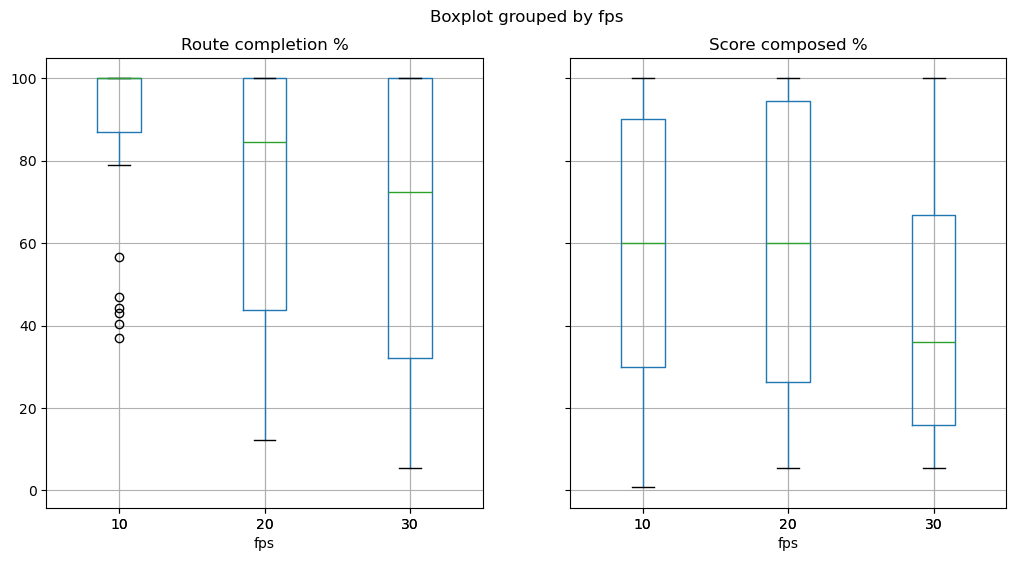

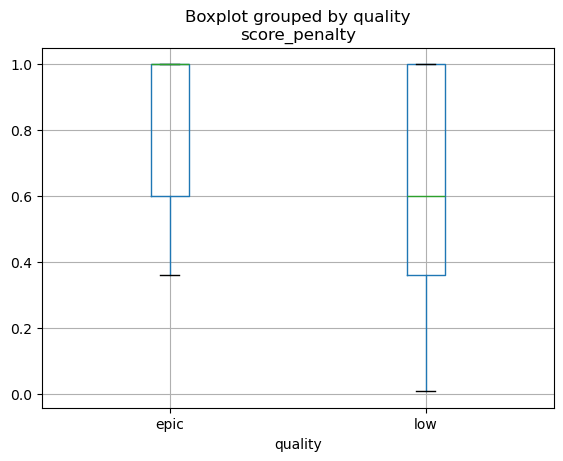

In [ ]:
size = 6
fig, ax = plt.subplots(figsize=(size*2, size))

axes = df.boxplot(column=['score_route', 'score_composed'],
                  by='fps', ax=ax)

axes[0].set_title("Route completion %")
axes[1].set_title("Score composed %")


df.boxplot(column=['score_penalty'],
           by='quality')

## Conclusions

With better quality, car has less penaulties -> driving better

# Q3: Does the change fidelity params affect the bhaviour of ADS (and how)

Per scenario analysis

In [ ]:
SCENARIO_ID = 2  # enter from 0 to 6 (we don't have more data)

scen_df = df[df['route_index'] == SCENARIO_ID]
interesting_columns = ['route_id', 'fps', 'quality', 'status', 'infractions.collisions_pedestrian', 'infractions.collisions_vehicle',
                       'infractions.outside_route_lanes', 'infractions.red_light', 'infractions.route_timeout']

scen_df = scen_df[interesting_columns].sort_values(
    by=['fps', 'quality']).reset_index(drop=True)
scen_df

,route_id,fps,quality,status,infractions.collisions_pedestrian,infractions.collisions_vehicle,infractions.outside_route_lanes,infractions.red_light,infractions.route_timeout
0,RouteScenario_18,10,epic,Failed - Agent timed out,[],[Agent collided against object with type=vehic...,[],[],[Route timeout.]
1,RouteScenario_18,10,epic,Failed - Agent timed out,[],[],[],[],[Route timeout.]
2,RouteScenario_18,10,epic,Failed - Agent got blocked,[],[Agent collided against object with type=vehic...,[],[],[]
3,RouteScenario_18,10,low,Failed - Agent timed out,[],[Agent collided against object with type=vehic...,[],[],[Route timeout.]
4,RouteScenario_18,10,low,Completed,[],[Agent collided against object with type=vehic...,[],[],[]
5,RouteScenario_18,10,low,Completed,[],[],[],[],[]
6,RouteScenario_18,20,epic,Failed - Agent timed out,[],[],[],[],[Route timeout.]
7,RouteScenario_18,20,epic,Failed - Agent timed out,[],[],[],[],[Route timeout.]
8,RouteScenario_18,20,epic,Failed - Agent timed out,[],[],[],[],[Route timeout.]
9,RouteScenario_18,20,low,Failed - Agent timed out,[],[],[],[],[Route timeout.]


# Final conclusions

I think its worth to use 10FPS, for MF Fusion